# Programação Diferenciável (Aprendizado Profundo - UFMG)

## Preâmbulo

O código abaixo consiste dos imports comuns. Além do mais, configuramos as imagens para ficar de um tamanho aceitável e criamos algumas funções auxiliares. No geral, você pode ignorar a próxima célula.

In [ ]:
# -*- coding: utf8

import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = .5
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 10

In [ ]:
plt.style.use('tableau-colorblind10') # use um estilo colorblind!
plt.ion()

## 1. Tensores em Numpy

O primeiro passo para usar numpy é importar a biblioteca.


In [ ]:
import numpy as np

Quando pensamos no lado prático do aprendizado profundo, um aspecto chave que ajuda na implementação de novos algoritmos é a chamada programação diferenciável. Na próxima aula vamos voltar na mesma. No momento, o importante é salientar que a programação diferenciável faz uso extensivo de Tensores.

Um [Tensor](http://en.wikipedia.org/wiki/Tensor) é uma generalização de matrizes para mais dimensões. Quando falamos de tensores, temos três casos especiais e um genérico que engloba os outros três:


1. **Escalar:** Um tensor de zero dimensões.

In [ ]:
1

1

2. **Vetor:** Um tensor de uma dimensão.

In [ ]:
np.array([1, 2])

array([1, 2])

3. **Matrizes:** Um tensor de duas dimensões.

In [ ]:
np.array([[1, 2], [3, 4]])

array([[1, 2],
       [3, 4]])

4. **Tensores**. Caso geral, representam n-dimensões. Na figura temos um tensor 3x3x3.

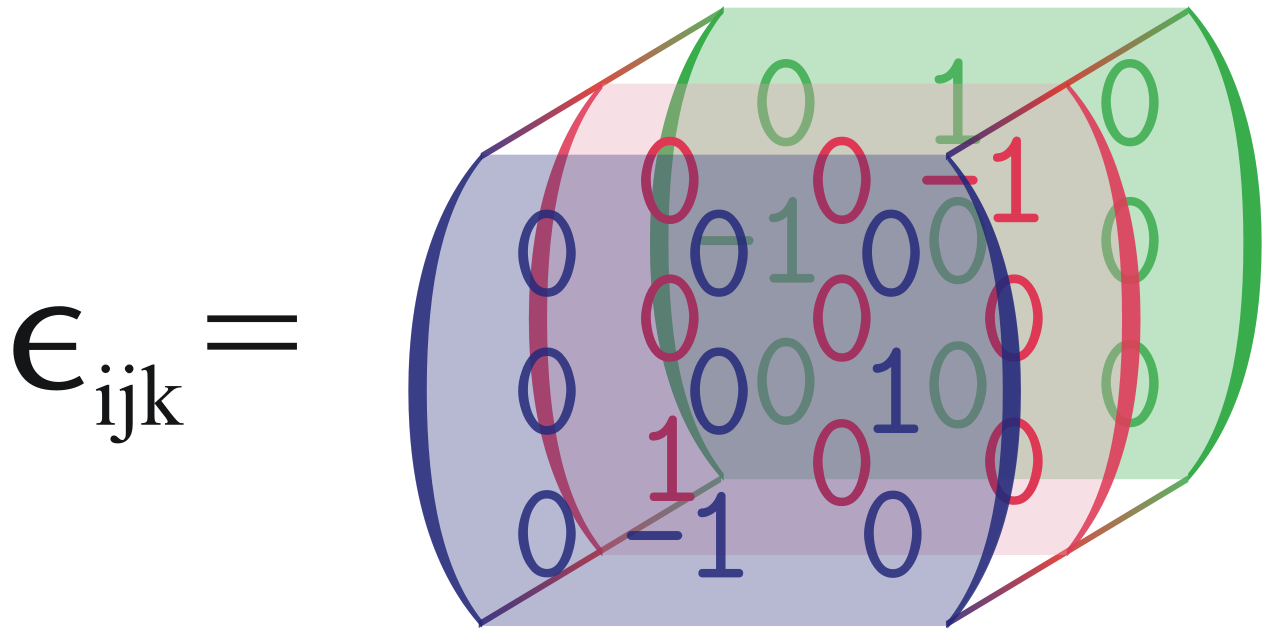
# ![](./figs/tensor.png)

No exemplo abaixo, temos um tensor de dimensão $3 \times 2 \times 2$.

In [ ]:
X = np.random.randn(3, 2, 2) # Gera números aleatórios de uma normal N(0, 1)
X

array([[[-0.06660965,  0.31547158],
        [ 0.13452463,  0.55815581]],

       [[-1.48999998, -1.61214135],
        [-1.04124586,  0.67929137]],

       [[-0.35691515, -1.11419325],
        [-0.84432855,  2.15831105]]])

Note que ao selecionar elementos da primeira dimensão ficamos com matrizes $2 \times 2$.

In [ ]:
X[0]

array([[-0.06660965,  0.31547158],
       [ 0.13452463,  0.55815581]])

In [ ]:
X[1]

array([[-1.48999998, -1.61214135],
       [-1.04124586,  0.67929137]])

In [ ]:
X[2]

array([[-0.35691515, -1.11419325],
       [-0.84432855,  2.15831105]])

### 1.1) Indexando

Sendo X uma matriz:

In [ ]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

Podemos selecionar uma linha com a sintaxe `X[i]`, sendo `i` um inteiro.

In [ ]:
X[0] # pegando a primeira linha de X

array([1, 2])

Podemos selecionar uma coluna com a sintaxe `X[:, j]`, sendo `j` um inteiro.

In [ ]:
X[:, 1] # pegando a segunda coluna de X

array([2, 4])

Podemos selecionar mais de uma linha ou coluna utilizando a sintaxe `X[um_vetor]` ou `X[:, um_vetor]`, respectivamente.

In [ ]:
X = np.array([[1, 2, 3], [4, 5, 6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
cols = [0, 1]
X[:, cols] # iremos pegar a primeira e segunda colunas de X

array([[1, 2],
       [4, 5]])

Podemos selecionar linhas e colunas também indexando o tensor através de um vetor booleano.

A sintaxe `X[vetor_booleano]` retorna as linhas (ou colunas quando `X[:, vetor_booleano]`) onde o vetor é `True`.

In [ ]:
X[[True, False]] # selecionamos apenas a primeira linha

array([[1, 2, 3]])

In [ ]:
X[:, [True, False, True]] # selecionamos apenas a primeira e última coluna

array([[1, 3],
       [4, 6]])

### 1.2) Shape, Reshape e Ravel

Todo vetor, matriz e tensor pode ser redimensionado.

Observe como no tensor abaixo temos `3x2x2=12` elementos. Podemos redimensionar os mesmos para outros tensores com 12 elementos.

In [ ]:
X = np.random.rand(3, 2, 2)
X.shape

(3, 2, 2)

Podemos redimensionar os elementos como uma matriz $2 \times 6$:

In [ ]:
X_matrix = X.reshape((2, 6))
X_matrix.shape

(2, 6)

Em Numpy (e PyTorch), podemos fazer com que a biblioteca infira uma dimensão utilizando `-1`:

In [ ]:
X_matrix = X.reshape((2, -1))
X_matrix.shape # Note que também temos uma matriz de dimensão: 2x6

(2, 6)

Podemos redimensionar os elementos para um outro tensor:

In [ ]:
X_tensor = X.reshape((6, 2, 1))
X_tensor.shape

(6, 2, 1)

E, por fim, podemos redimensionar os elementos como um vetor, realizando uma operação de `flattening`:

In [ ]:
X_vetor = X.flatten()
X_vetor.shape

(12,)

**Observação:** Podemos redimensionar os elementos como um vetor de 3 formas principais:
1. Através da função `flatten`, como visto acima;
2. Através da função `ravel` (presente tanto em Numpy quanto em PyTorch);
3. Através de um `.reshape`, passando como parâmetro o número dos elementos (ou -1).

Os 3 métodos possuem algumas sutilezas que diferenciam um dos outros. Para mais informações consulte o seguinte [link](https://www.techentice.com/numpy-difference-between-reshape-flatten/#:~:text=Use%20flatten()%20when%20you,create%20only%201-D%20array.).

## 2. Tensores em PyTorch

PyTorch é o arcabouço que vamos usar para as nossas tarefas. Assim como o NumPy, o Pytorch é uma biblioteca de processamento vetorial/matricial/tensorial. Operações sobre os tensores do Pytorch possuem sintaxe consideravelmente parecida com operações sobre tensores do NumPy.

O mesmo faz uso de tensores bem similares ao NumPy. Porém, com PyTorch conseguimos fazer uso da GPU.

In [ ]:
import torch

### 2.1) Casting para o dispositivo correto

Como usaremos processamento vetorial principalmente em GPUs para aprendizado profundo, primeiramente é possível verificar se há uma GPU disponível com o trecho de código abaixo, armazenando os tensores nos dispositivos apropriados.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


Podemos também realizar essa verificação em uma linha de código (+ pytônico)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


### 2.2.) Tensores no Pytorch

Para criar tensores novos, podemos utilizar a função `torch.tensor`, similar à função `numpy.array` da biblioteca Numpy:

In [ ]:
tns = torch.tensor([1, 2, 3, 4, 5, 6])
print(tns)

tensor([1, 2, 3, 4, 5, 6])


Podemos redimensionar os tensores de maneira similar ao que vimos em Numpy através da função `view`:

In [ ]:
print(tns.view(2, 3))

tensor([[1, 2, 3],
        [4, 5, 6]])


Assim como mencionado em Numpy, podemos utilizar `-1` para fazer com que a biblioteca faça uma inferência no formato necessário de acordo com os elementos restantes:

In [ ]:
# Note que obtemos o mesmo tensor anterior
print(tns.view(2, -1))

tensor([[1, 2, 3],
        [4, 5, 6]])


**Observação:** Em PyTorch, além de possuirmos a função `view`, também possuímos a função `reshape`. Ambas possuem algumas diferenças sutis. Caso queira obter mais informações sobre tais diferenças, acesse o seguinte [link](https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch). Porém, no geral, iremos trabalhar mais com a função `view` ao desenvolver códigos utilizando PyTorch.

Podemos criar tensores previamente preenchidos por elementos, como 0s através da função `torch.zeros` e 1s através da função `torch.ones`:

In [ ]:
tns_0 = torch.zeros(2, 3) # iniciando um tensor com 0s
tns_1 = torch.ones(2, 3) # iniciando um tensor com 1s

print(tns_0)
print(tns_1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


Similar à funções do Numpy, podemos iniciar tensores com valores aleatórios:

In [ ]:
tns_u = torch.rand(2, 3) # valores que seguem uma distribuição uniforme
print(tns_u)

tns_n = torch.randn(2, 3) # valores que seguem uma distribuição normal
print(tns_n)

tns_perm = torch.randperm(6) # valores que são uma permutação aleatória no intervalo [0, 5]
print(tns_perm)

tensor([[0.5401, 0.9377, 0.0047],
        [0.6100, 0.8337, 0.6879]])
tensor([[-1.4032e+00, -5.6653e-01, -1.2894e-03],
        [ 2.1798e-02,  1.0908e-01,  5.7875e-01]])
tensor([5, 1, 2, 3, 4, 0])


Similar à Numpy, podemos realizar operações de soma, multiplicação, entre outras, com tensores:

In [ ]:
print(tns_u)
print(tns_n)

tns_sum = tns_u + tns_n
print(tns_sum)

tensor([[0.5401, 0.9377, 0.0047],
        [0.6100, 0.8337, 0.6879]])
tensor([[-1.4032e+00, -5.6653e-01, -1.2894e-03],
        [ 2.1798e-02,  1.0908e-01,  5.7875e-01]])
tensor([[-0.8631,  0.3712,  0.0034],
        [ 0.6318,  0.9428,  1.2667]])


Similar à Numpy, podemos indexar os tensores da mesma forma apresentada anteriormente:

In [ ]:
print(tns_sum[1, 1]) # Indexando um elemento
print(tns_sum[0, :]) # Indexando uma linha (pode também ser tns_sum[0])
print(tns_sum[:, 1]) # Indexando uma coluna

tensor(0.9428)
tensor([-0.8631,  0.3712,  0.0034])
tensor([0.3712, 0.9428])


Podemos utilizar a função `torch.from_numpy` para converter um tensor de Numpy para PyTorch; ou a função `.numpy()` para converter um tensor de PyTorch para Numpy:

In [ ]:
np_arr = np.random.randn(2, 3)
print(np_arr, np_arr.dtype)

torch_tns = torch.from_numpy(np_arr)
print(torch_tns)

arr = torch_tns.numpy()
print(arr)

[[ 0.09579046  0.50616887 -0.34923084]
 [ 0.69487476 -1.18931518  0.04173277]] float64
tensor([[ 0.0958,  0.5062, -0.3492],
        [ 0.6949, -1.1893,  0.0417]], dtype=torch.float64)
[[ 0.09579046  0.50616887 -0.34923084]
 [ 0.69487476 -1.18931518  0.04173277]]


Por fim, podemos concatenar dois, ou mais, tensores com a função `torch.cat`:
- O parâmetro `dim` em PyTorch é análogo ao parâmetro `axis` do Numpy. Nele, iremos informar sobre qual dimensão queremos que uma certa operação seja feita. No caso abaixo, ao informarmos a primeira dimensão (0), estamos dizendo para o PyTorch efetuar uma concatenação dos dois tensores a partir da sua primeira dimensão, ou seja, "colando" os tensores verticalmente (no sentido das linhas).

In [ ]:
tns_cat = torch.cat((tns_0, tns_1), dim=0)
print(tns_cat)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [1., 1., 1.],
        [1., 1., 1.]])


Várias outras operações sobre tensores do Pytorch podem ser vistas nos seguintes tutoriais:
1.   https://jhui.github.io/2018/02/09/PyTorch-Basic-operations/
2.   https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Conjunto de Problemas 1: Vetorização

Antes de continuar, vamos importar algumas funções que serão utilizadas para testar o resultado dos seus algoritmos.

Estas, vão vir do módulo `testing` do numpy.

In [ ]:
from numpy.testing import assert_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

Seu objetivo é medir a velocidade das operações de álgebra linear para diferentes níveis de vetorização.

1. Construa duas matrizes $ A $ e $ B $ com entradas aleatórias Gaussianas de tamanho $ 128 \times 256 $.
**Dica:** Use o módulo time para mensurar o tempo da operação.

In [ ]:
# Implemente a sua solução aqui
A = torch.randn(128, 256)
B = torch.randn(128, 256)

In [ ]:
# testes, não apague as linhas!!
assert_equal((128, 256), A.shape)
assert_equal((128, 256), B.shape)

# A chamada .numpy() converte os vetores em vetores numpy. Útil para testes!
Anp = A.numpy()
Bnp = A.numpy()

# testando média e desvio padrão
assert_almost_equal(Anp.mean(), 0, decimal=2)
assert_almost_equal(Anp.std(ddof=1), 1, decimal=2)

assert_almost_equal(Bnp.mean(), 0, decimal=2)
assert_almost_equal(Bnp.std(ddof=1), 1, decimal=2)

2. Calcule $C = AB^T$, tratando $ A $ como uma matriz, mas computando o resultado para cada coluna de $ B $. Em outras palavras, realize um produto matricial utilizando um laço `for`! Pare realizar este código, é importante entender o conceito de broadcasting.

Em código numpy e torch, a operação de broadcasting replica linhas e colunas de tensores para realizar operações. Para entender melhor, leia o [documento](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). A figura abaixo exemplifica broadcasting. No geral, as dimensões de arrays casam, as operações são realizadas (primeira linha da figura). Mesmo quando as dimensões não casem, se a última dimensão for compatível é feito a replicação (broadcasting), ver a segunda linha da figura. Por fim, mesmo quando as dimensões não casam mas uma delas é 1 (4x1 + 1x3 na linha 3), é feito broadcasting.

#![](./figs/broadcasting.png)

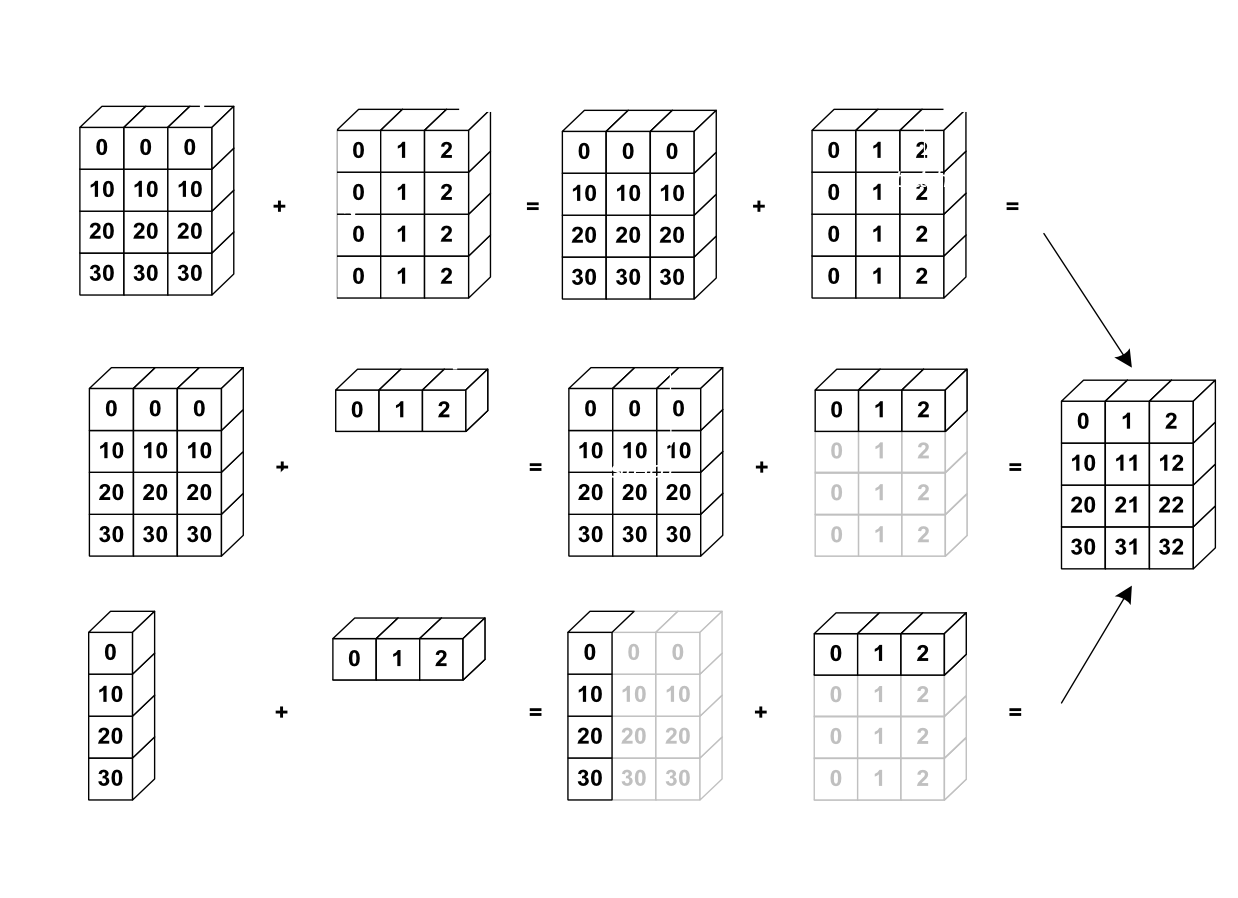



**Dica:** Você deverá fazer o código em uma linha apenas. Para isso, você vai focar no caso da linha 2 da figura. Multiplique uma linha de A por B. Depois disso, use `.sum(axis=...)` para realizar a soma na dimensão correta.

In [ ]:
%%time

C = np.zeros((128, 128))
for linha in range(A.shape[0]):
    # implemente aqui a sua solução
    C[linha] = (A[linha] * B).sum(dim=1)

CPU times: user 7.41 ms, sys: 895 µs, total: 8.31 ms
Wall time: 9.92 ms


In [ ]:
# testes, não apague as linhas!!
Cteste = np.matmul(A, B.T)  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C, decimal=3)

3. Calcule $ C = AB^t $ usando operações matriciais. Ou seja, sem usar nenhum laço. Ao mensurar o tempo, ficou mais rápido?

In [ ]:
%%time

# Implemente aqui a sua solução
C = torch.mm(A, B.T)

CPU times: user 773 µs, sys: 0 ns, total: 773 µs
Wall time: 785 µs


In [ ]:
# testes, não apague as linhas!!
Cteste = np.matmul(A, B.T)  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C, decimal=3)

- Observando o tempo gasto nas duas formas de calcular $C = AB^T$, podemos perceber que ao utilizarmos funções nativas da biblioteca (como `np.matmul` e `torch.mm`), temos uma redução significativa do tempo se compararmos à utilização de um laço `for`.

## Conjunto de Problemas 2: Computação eficiente de memória

Crie duas matrizes aleatórias de tamanho $4096 \times 4096$. Chame as mesmas de $A$ e $B$ novamente.



In [ ]:
# Implemente aqui a sua solução
A = torch.randn(4096, 4096)
B = torch.randn(4096, 4096)

5. Crie uma função que recebe as matrizes $A$, $B$ e $C$, e um número de iterações para atualizar $C$, de forma que $C = AB^T + C$. Essa função deve, primeiro, calcular a multiplicação de matrizes entre $A$ e $B$ e depois adicionar o valor à $C$, de acordo com o número de iterações. A mesma deve atualizar $C$ sem alocar memória nova para essa variável.

In [ ]:
def update_c(C, A, B, n_iter=2):
    matrix_product = torch.mm(A, B.T)
    for _ in range(n_iter):
        C += matrix_product

    return C

In [ ]:
# testes não apague!
Ct = torch.zeros(A.shape)
Cteste = (Ct + np.matmul(A, B.T))
Cteste = (Cteste + np.matmul(A, B.T))

C = torch.zeros(A.shape)
update_c(C, A, B, 2)
assert_array_almost_equal(Cteste, C.numpy(), decimal=3)

## Conjunto de Problemas 3: Programação Diferenciável

Agora vamos aprender um dos pontos chaves de fazer uso de bibliotecas como pytorch/tensorflow/etc, a programação diferenciável. Diferente do exercício que vocês fizeram na mão, usando a biblioteca conseguimos derivar de forma automágica. Portanto, observe como o código abaixo deriva a função seno.

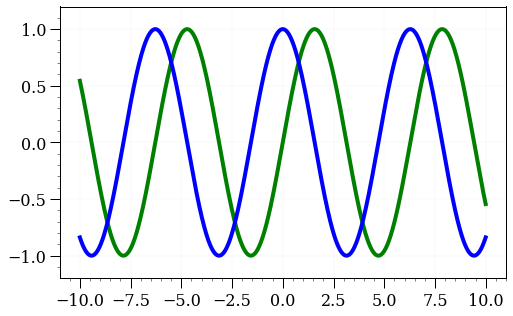

In [ ]:
x = np.linspace(-10, 10, 1000)
x_torch = torch.tensor(x, requires_grad=True)

y = torch.sin(x_torch)  # seno original

# Devido ao fato de que o y final não é um escalar precisamos passar o vetor v tal que v é a jacobiana
# pela qual vamos multiplicar as jacobianas da variavel node (neste caso, x) conforme descrito em
# https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
# veremos mais sobre o processo de backprogation, jacobiano, etc no futuro
v = torch.ones(x_torch.shape, dtype=torch.double)

# Como aqui x da origem a y diretamente, nosso v sera apenas um vetor de 1's com a mesma dimensao de x
y.backward(v)

plt.plot(x_torch.detach().numpy(), y.detach().numpy(), 'g', label='sin(x)')
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), 'b', label='sin\'(x)')

O resultado é a mesma curva da função cosseno! Para entender melhor o autograd, leia a seção respectiva do [pyTorch Blitz](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html).

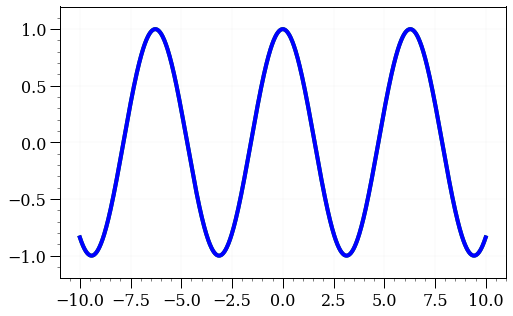

In [ ]:
plt.plot(x_torch.detach().numpy(), x_torch.grad.numpy(), 'g', label='sin\'(x)')
plt.plot(x_torch.detach().numpy(), torch.cos(x_torch).detach().numpy(), 'b', label='cos(x)')

6. Derive a função logística usando pytorch.

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [ ]:
x = np.linspace(-10, 10, 1000) # Não mude o valor de x!
x_torch = torch.from_numpy(x)

# implemente
x_torch.requires_grad_(True)
f = 1 / (1 + torch.exp(-x_torch))
v = torch.ones(x_torch.shape, dtype=torch.double)
f.backward(v)

In [ ]:
# testes, não apagar
y_test = 1.0/(1 + np.exp(-x))
derivada_teste = y_test * (1 - y_test)
assert_array_almost_equal(derivada_teste, x_torch.grad.numpy(), decimal=3)

A operação *detach* permite quebrar a computação em várias partes. Em particular, isto é útil para aplicar a regra da cadeia. Suponha que $u = f(x)$ e $z = g(u)$, pela regra da cadeia, temos $\frac{dz}{dx}$ = $\frac{dz}{du}\frac{du}{dx}$. Para calcular $\frac{dz}{du}$, podemos primeiro separar $u$ da computação e, em seguida, chamar `z.backward()` para calcular o primeiro termo.

Observe no caso abaixo como derivamos $u = x^2$. A resposta deve ser $2x$ para cada termo `[0, 1, 2, 3]`.

In [ ]:
x = torch.arange(4, dtype =torch.float)
x.requires_grad_(True)

u = x * x
jacobX = torch.ones(x.shape)
u.backward(jacobX)
x.grad

tensor([0., 2., 4., 6.])

Agora vamos fazer $z = u^3$ e computar as derivadas intermediarias.

In [ ]:
x = torch.arange(4, dtype = torch.float)
x.requires_grad_(True)

u = x * x
v = u.detach()  # u still keeps the computation graph
v.requires_grad_(True)
z = v * v * v

print(z)

jacobX = torch.ones(x.shape)
u.backward(jacobX)
x.grad

tensor([  0.,   1.,  64., 729.], grad_fn=<MulBackward0>)


tensor([0., 2., 4., 6.])

Acima temos a derivada de $x^2$. Abaixo temos a derivada de $g(x^2)$.

In [ ]:
jacobV = torch.ones(v.shape)
z.backward(jacobV)
v.grad

tensor([  0.,   3.,  48., 243.])

7. Agora, sendo $f(x) = 1 + x^2$ e $g(x) = 1 + 7  f(x)^4$. Vamos aplicar a regra da cadeia em pytorch

In [ ]:
x = torch.arange(4, dtype = torch.float)

# implemente a derivada de f(x) em função de x
x.requires_grad_(True)
jacobX = torch.ones(x.shape)

f = 1 + x * x
f.backward(jacobX)

In [ ]:
# teste para x
# Aqui pode ser meio confuso, mas o gradiente referente à derivada de
# f(x) com relação a x, por exemplo, fica armazenada no tensor x, mais especificamente em x.grad
assert_array_almost_equal([0, 2, 4, 6], x.grad.numpy())

In [ ]:
# implemente a derivada de g(x) em função de f(x)
u = f.detach()
u.requires_grad_(True)
jacobU = torch.ones(u.shape)

g = 1 + 7 * torch.pow(u, 4)
g.backward(jacobU)

u.grad

tensor([   28.,   224.,  3500., 28000.])

In [ ]:
# Testando a sua solução (caso seja necessário, modifique o nome da sua variável auxiliar para 'u')
# Note que agora o gradiente referente à derivada está presente na variável 'u', e não mais em 'x'
assert_array_almost_equal([28, 224, 3500, 28000], u.grad.numpy())

### Conjunto de Problemas 4: Mais Derivadas

Vamos brincar um pouco de derivadas dentro de funções. Dado dois números $x$ e $y$, implemente a função `log_exp`, que retorna:

$$ f(x,y) = -\log\left(\frac{e^x}{e^x+e^y}\right)$$

In [ ]:
def log_exp(x, y):
    # implemente aqui a sua solução
    return -1 * torch.log(torch.exp(x) / (torch.exp(x) + torch.exp(y)))

1. Abaixo vamos testar o seu código com algumas entradas simples.

In [ ]:
x, y = torch.tensor([2.0]), torch.tensor([3.0])
z = log_exp(x, y)
z

tensor([1.3133])

In [ ]:
# Teste. Não apague
assert_almost_equal(1.31326175, z.numpy())

2. A função a seguir computa $\partial z/\partial x$ e $\partial z/\partial y$ usando `autograd`.

In [ ]:
# O argumento funcao_forward é uma função python. Será a sua log_exp.
# A ideia aqui é deixar claro a ideia de forward e backward propagation, depois
# de avaliar a função chamamos backward e temos as derivadas.
def grad(funcao_forward, x, y):
    x.requires_grad_(True)
    y.requires_grad_(True)
    z = funcao_forward(x, y)
    z.backward()
    return x.grad, y.grad

Testando

In [ ]:
x, y = torch.tensor([2.0], dtype = torch.double) ,torch.tensor([3.0], dtype = torch.double)
dx, dy = grad(log_exp, x, y)

In [ ]:
assert_almost_equal(-0.7310586, dx.numpy())
assert_almost_equal(0.7310586, dy.numpy())

4. Agora teste com números maiores, algum problema?

In [ ]:
x, y = torch.tensor([400.0]).double() ,torch.tensor([800.0]).double()
grad(log_exp, x, y)

(tensor([nan], dtype=torch.float64), tensor([nan], dtype=torch.float64))

5. Pense um pouco sobre o motivo do erro acima. Usando as propriedade de logaritmos, é possível fazer uma função mais estável. Abaixo segue a implementação da mesma. O problema aqui é que o exponencial "explode" quando $x$ ou $y$ são muito grandes. Este [link](http://www.wolframalpha.com/input/?i=log[e%5Ex+%2F+[e%5Ex+%2B+e%5Ey]]) pode ajudar.

In [ ]:
x, y = torch.tensor([400.0], dtype = torch.double), torch.tensor([800.0], dtype = torch.double)
def stable_log_exp(x, y):
    return torch.log(1 + torch.exp(y-x))

dx, dy = grad(stable_log_exp, x, y)

In [ ]:
stable_log_exp(x, y)

tensor([400.], dtype=torch.float64, grad_fn=<LogBackward0>)

In [ ]:
# Teste. Não apague
assert_equal(-1, dx.numpy())
assert_equal(1, dy.numpy())

O exemplo acima mostra um pouco de problemas de estabilidade númerica. Às vezes é melhor usar versões alternativas de funções. Isto vai ocorrer quando você ver vários `nans` na sua frente :-) Claro, estamos assumindo que existe uma outra função equivalente que é mais estável para o computador.